In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# load our data set
data = pd.read_csv('Fraud.csv')

In [3]:
# create copy of our data set
df = data.copy()

## EDA

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

##### step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

##### type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

##### amount - amount of the transaction in local currency.

##### nameOrig - customer who started the transaction

##### oldbalanceOrg - initial balance before the transaction

##### newbalanceOrig - new balance after the transaction

##### nameDest - customer who is the recipient of the transaction

##### oldbalanceDest - initial balance recipient before the transaction.

##### newbalanceDest - new balance recipient after the transaction.

##### isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

##### isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#shape of dataset
size = df.shape
print("Total number of rows : " , size[0])
print("Total number of columns : ",size[1])

Total number of rows :  6362620
Total number of columns :  11


In [ ]:
# check null values present in our dataset
null_columns=[feature for feature in data.columns if df[feature].isnull().sum()>0]
if len(null_columns) == 0:
    print("There is no null values in dataset")
else:
    print(f"Missing values are present in these columns :{null_columns}")

There is no null values in dataset


In [ ]:
# check duplicates values
df.duplicated().sum()

np.int64(0)

In [4]:
# stats information of all columns
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


##### The majority type is cash_out with 2237500.

##### There's a lot of variability in name_orig, so it could be hard to use one hot encoding.

##### There's less name_orig than name_dest. There's more users sending than receiving, however use one hot encoding will not help.

##### There's more fraud than the flagged fraud, it shows that the current method can't recognize fraud efficiently.

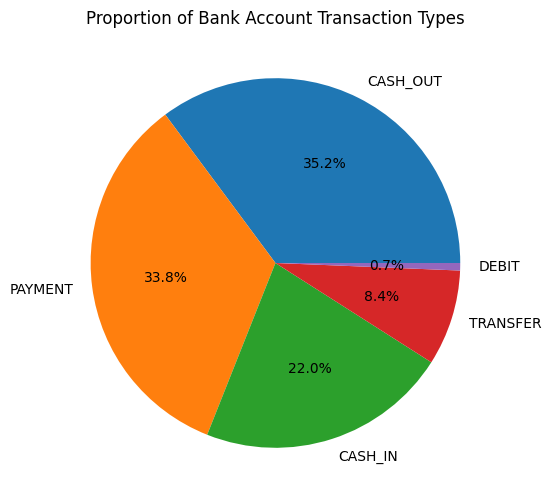

In [ ]:
# visual representation
type_counts = df['type'].value_counts()
plt.figure(figsize = (8,6))
plt.pie(type_counts.values , labels = type_counts.index,autopct='%1.1f%%')
plt.title('Proportion of Bank Account Transaction Types')
plt.show()

##### CASH_OUT is the most preferred by customers.

maximum amount pay by customer : 92445516.64
minimun amount pay by customer : 0.0


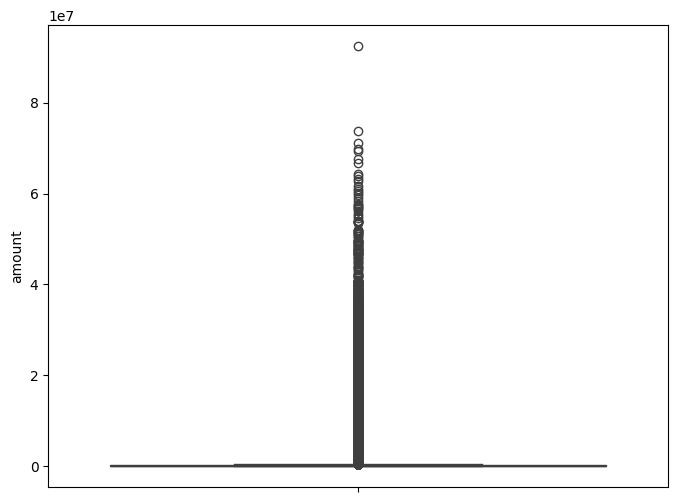

In [ ]:
# create a bar plot for amount
print('maximum amount pay by customer :',df['amount'].max())
print('minimun amount pay by customer :',df['amount'].min())
plt.figure(figsize=(8,6))
sns.boxplot(y=df['amount'])
plt.show()

       type   amount
0   CASH_IN  1399284
1  CASH_OUT  2237500
2     DEBIT    41432
3   PAYMENT  2151495
4  TRANSFER   532909


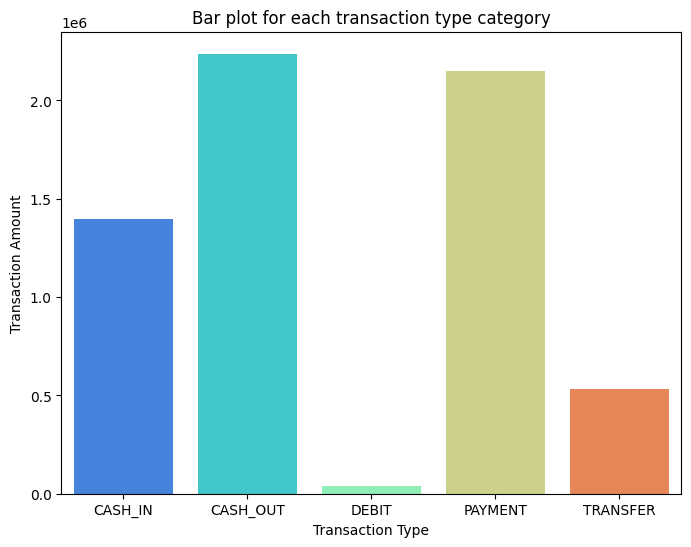

In [ ]:
# Create a bar plot for each transaction type category
total_count = df.groupby('type')['amount'].size().reset_index()
print(total_count)
plt.figure(figsize=(8,6))
sns.barplot(x = total_count['type'] , y = total_count['amount'] , palette = 'rainbow')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.title('Bar plot for each transaction type category')
plt.show()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: count, dtype: int64


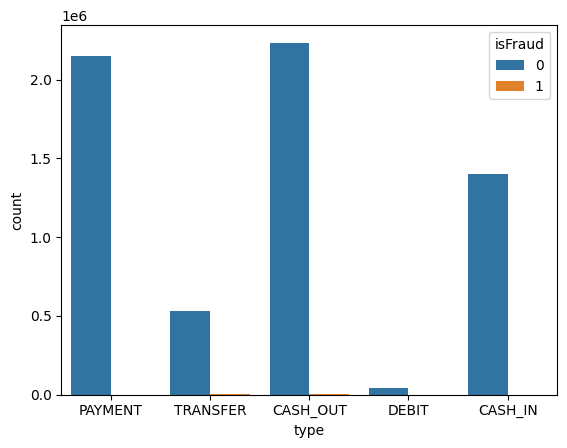

In [ ]:
print(df.groupby('type')['isFraud'].value_counts())
sns.countplot(x = 'type' , hue = 'isFraud' , data = df)
plt.show()

##### CASH_OUT and TRANSFER methods which are use to do Fraud

## Feature Engineering

In [ ]:
# difference between initial balance before the transaction and new balance after the transaction
df['diff_new_old_balance'] = df['newbalanceOrig'] - df['oldbalanceOrg']
# difference between initial balance recipient before the transaction and new balance recipient after the transaction.
df['diff_new_old_destiny'] = df['newbalanceDest'] - df['oldbalanceDest']

In [ ]:
# remove columns which are not related with target columns.
df=df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'diff_new_old_balance',
       'diff_new_old_destiny'],
      dtype='object')

In [ ]:
df['isFraud'].value_counts()
# Output display that it is imbalance data

,count
isFraud,
0,6354407
1,8213


In [ ]:
x = df.drop(['isFraud'],axis =1)
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,diff_new_old_balance,diff_new_old_destiny
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,-9839.64,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,-1864.28,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,-181.00,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,-181.00,-21182.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,-11668.14,0.0


In [ ]:
# split categorical columns
cat = df.select_dtypes(
    include = ['object']
).columns.tolist()
cat

['type']

In [ ]:
# split numerical columns
num = df.select_dtypes(
    include = ['float64','int64']
).columns.tolist()
num

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'diff_new_old_balance',
 'diff_new_old_destiny']

In [ ]:
y = df['isFraud']
print('x shape ' ,x.shape)
print('y shape ' ,y.shape)

x shape  (6362620, 9)
y shape  (6362620,)


In [ ]:
from sklearn.model_selection import train_test_split ,cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score , confusion_matrix ,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import  SMOTE

In [ ]:
# split our data
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.20 , random_state=42)

In [ ]:
print('x_train shape ' , x_train.shape)
print('y_train shape ' , y_train.shape)

x_train shape  (5090096, 9)
y_train shape  (5090096,)


In [ ]:
# Encoding and standarization
preprocess = ColumnTransformer([
        ('cat' , OneHotEncoder(sparse_output = False ,handle_unknown = 'ignore') ,["type"]),
        ('num', StandardScaler() ,['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','diff_new_old_balance','diff_new_old_destiny'] )
    ])


In [ ]:
# Stratified K-Fold CV on training set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## LogisticRegression

In [ ]:
pipe = Pipeline([
    ('preprocess', preprocess),
    # balance dataset
    ('smote', SMOTE(random_state=42)),
    ('logistic', LogisticRegression())
])
pipe.fit(x_train,y_train)
l_pred=pipe.predict(x_test)
print("accuracy_score :",accuracy_score(l_pred , y_test))
print("confusion_matrix :",confusion_matrix(l_pred,y_test))
print("classification_report :\n",classification_report(l_pred,y_test))
l_c=cross_val_score(pipe,x_train, y_train, cv=skf, scoring='accuracy')
print("StratifiedKFold :",l_c)
print("StratifiedKFold score:",np.mean(l_c))

accuracy_score : 0.9509305914858973
confusion_matrix : [[1208539      77]
 [  62365    1543]]
classification_report :
               precision    recall  f1-score   support

           0       0.95      1.00      0.97   1208616
           1       0.95      0.02      0.05     63908

    accuracy                           0.95   1272524
   macro avg       0.95      0.51      0.51   1272524
weighted avg       0.95      0.95      0.93   1272524

StratifiedKFold : [0.95018173 0.9509793  0.95037814 0.95037028 0.95013944]
StratifiedKFold score: 0.9504097762061955


## XGBClassifier

In [ ]:
pipe = Pipeline([
    ('preprocess', preprocess),
    # balance dataset
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier( ))
])
pipe.fit(x_train,y_train)
xgb_pred=pipe.predict(x_test)
print("accuracy_score :",accuracy_score(xgb_pred , y_test))
print("confusion_matrix :",confusion_matrix(xgb_pred,y_test))
print("classification_report :\n",classification_report(xgb_pred,y_test))
xgb_c=cross_val_score(pipe,x_train,y_train,cv=skf, scoring='accuracy')
print("StratifiedKFold :",xgb_c)
print("StratifiedKFold score :",np.mean(xgb_c))


accuracy_score : 0.9979002360662745
confusion_matrix : [[1268241       9]
 [   2663    1611]]
classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1268250
           1       0.99      0.38      0.55      4274

    accuracy                           1.00   1272524
   macro avg       1.00      0.69      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524

StratifiedKFold : [0.99785564 0.99803245 0.99795878 0.99778491 0.99797548]
StratifiedKFold score : 0.997921453753684
